In [1]:
#!python -m pip install prophet

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
end=dt.datetime.now()
start=dt.datetime(end.year-30,end.month,end.day)

In [4]:
df=reader.get_data_yahoo('GOOG',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,2.591785,2.390042,2.490664,2.499133,897427216.0,2.499133
2004-08-20,2.716817,2.503118,2.515820,2.697639,458857488.0,2.697639
2004-08-23,2.826406,2.716070,2.758411,2.724787,366857939.0,2.724787
2004-08-24,2.779581,2.579581,2.770615,2.611960,306396159.0,2.611960
2004-08-25,2.689918,2.587302,2.614201,2.640104,184645512.0,2.640104
...,...,...,...,...,...,...
2022-08-01,117.120003,114.690002,115.529999,115.480003,22856200.0,115.480003
2022-08-02,117.080002,114.260002,114.430000,115.900002,17911000.0,115.900002
2022-08-03,119.419998,116.150002,116.339996,118.779999,25302800.0,118.779999


In [5]:
model=Prophet()

In [6]:
df=df.reset_index()

In [7]:
df[['ds','y']]=df[['Date','Adj Close']]
df

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2004-08-19,2.591785,2.390042,2.490664,2.499133,897427216.0,2.499133,2004-08-19,2.499133
1,2004-08-20,2.716817,2.503118,2.515820,2.697639,458857488.0,2.697639,2004-08-20,2.697639
2,2004-08-23,2.826406,2.716070,2.758411,2.724787,366857939.0,2.724787,2004-08-23,2.724787
3,2004-08-24,2.779581,2.579581,2.770615,2.611960,306396159.0,2.611960,2004-08-24,2.611960
4,2004-08-25,2.689918,2.587302,2.614201,2.640104,184645512.0,2.640104,2004-08-25,2.640104
...,...,...,...,...,...,...,...,...,...
4518,2022-08-01,117.120003,114.690002,115.529999,115.480003,22856200.0,115.480003,2022-08-01,115.480003
4519,2022-08-02,117.080002,114.260002,114.430000,115.900002,17911000.0,115.900002,2022-08-02,115.900002
4520,2022-08-03,119.419998,116.150002,116.339996,118.779999,25302800.0,118.779999,2022-08-03,118.779999
4521,2022-08-04,119.500000,117.709999,118.300003,118.870003,15757700.0,118.870003,2022-08-04,118.870003


In [8]:
model.fit(df)

14:41:38 - cmdstanpy - INFO - Chain [1] start processing
14:41:41 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future=model.make_future_dataframe(periods=365)
future

,ds
0,2004-08-19
1,2004-08-20
2,2004-08-23
3,2004-08-24
4,2004-08-25
...,...
4883,2023-08-01
4884,2023-08-02
4885,2023-08-03
4886,2023-08-04


In [10]:
forecast=model.predict(future)

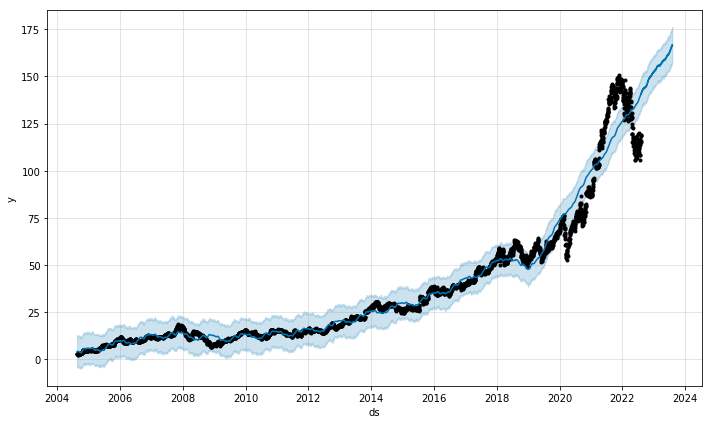

In [12]:
model.plot(forecast);
plt.show()

In [13]:
forecast.set_index(['ds'],inplace=True)

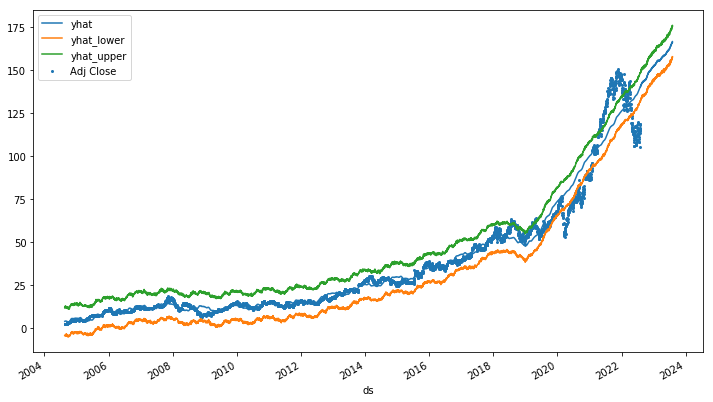

In [14]:
forecast[['yhat','yhat_lower','yhat_upper']].plot(figsize=(12,7))
plt.scatter(x=df['ds'],y=df['Adj Close'],s=4,label='Adj Close')
plt.legend()
plt.show()

In [15]:
end=dt.datetime.now()
start=dt.datetime(end.year-30,end.month,end.day)

In [16]:
df=reader.get_data_yahoo('TSLA',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2022-08-01,935.630005,885.000000,903.830017,891.830017,39014300.0,891.830017
2022-08-02,923.500000,878.000000,882.010010,901.760010,31859200.0,901.760010
2022-08-03,928.650024,903.450012,915.000000,922.190002,26697000.0,922.190002


In [17]:
model=Prophet()

In [18]:
df1=df.reset_index()

In [19]:
df1[['ds','y']]=df1[['Date','Adj Close']]
df1

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000,2010-06-29,4.778000
1,2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000,2010-06-30,4.766000
2,2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000,2010-07-01,4.392000
3,2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000,2010-07-02,3.840000
4,2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000,2010-07-06,3.222000
...,...,...,...,...,...,...,...,...,...
3043,2022-08-01,935.630005,885.000000,903.830017,891.830017,39014300.0,891.830017,2022-08-01,891.830017
3044,2022-08-02,923.500000,878.000000,882.010010,901.760010,31859200.0,901.760010,2022-08-02,901.760010
3045,2022-08-03,928.650024,903.450012,915.000000,922.190002,26697000.0,922.190002,2022-08-03,922.190002
3046,2022-08-04,940.820007,915.000000,933.000000,925.900024,24085400.0,925.900024,2022-08-04,925.900024


In [20]:
model.fit(df1)

14:42:12 - cmdstanpy - INFO - Chain [1] start processing
14:42:14 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future=model.make_future_dataframe(periods=365)
future

,ds
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02
4,2010-07-06
...,...
3408,2023-08-01
3409,2023-08-02
3410,2023-08-03
3411,2023-08-04


In [22]:
forecast=model.predict(future)

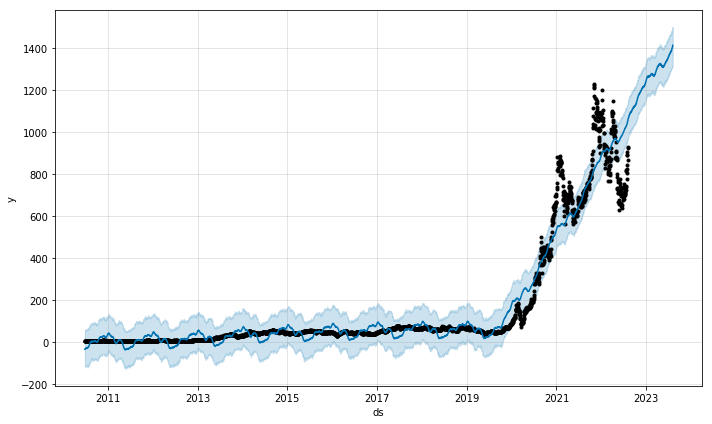

In [24]:
model.plot(forecast);
plt.show()